In [20]:
import pandas as pd
df=pd.read_csv("titanic-passengers.csv",sep=";")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df.dropna(axis=1,how="any",inplace=True)
df=df.drop(["Name","PassengerId",],axis=1)
df

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare
0,No,2,male,0,0,248740,13.0000
1,No,3,male,0,0,348123,7.6500
2,No,3,male,0,0,350050,7.8542
3,No,3,female,0,4,349909,21.0750
4,No,1,male,1,0,F.C. 12750,52.0000
...,...,...,...,...,...,...,...
886,Yes,2,female,1,0,237736,30.0708
887,No,3,male,0,0,2669,7.2292
888,No,3,female,0,0,315084,8.6625
889,No,3,male,0,0,349215,7.8958


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df["Survived"]= encoder.fit_transform(df["Survived"])
df["Sex"]= encoder.fit_transform(df["Sex"])
df

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare
0,0,2,1,0,0,248740,13.0000
1,0,3,1,0,0,348123,7.6500
2,0,3,1,0,0,350050,7.8542
3,0,3,0,0,4,349909,21.0750
4,0,1,1,1,0,F.C. 12750,52.0000
...,...,...,...,...,...,...,...
886,1,2,0,1,0,237736,30.0708
887,0,3,1,0,0,2669,7.2292
888,0,3,0,0,0,315084,8.6625
889,0,3,1,0,0,349215,7.8958


In [26]:
df=df.drop("Ticket",axis=1)
df

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,2,1,0,0,13.0000
1,0,3,1,0,0,7.6500
2,0,3,1,0,0,7.8542
3,0,3,0,0,4,21.0750
4,0,1,1,1,0,52.0000
...,...,...,...,...,...,...
886,1,2,0,1,0,30.0708
887,0,3,1,0,0,7.2292
888,0,3,0,0,0,8.6625
889,0,3,1,0,0,7.8958


In [27]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [34]:
x = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))    #2 valeurs apres la virgule

Accuracy=0.84


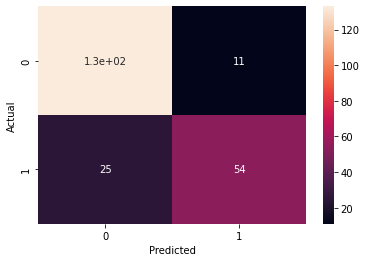

In [36]:
# Matrix
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

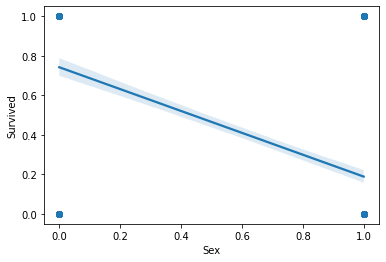

In [39]:
#Logistic Regression Distribution
sns.regplot(x='Sex',y='Survived',data=df)
